<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/MST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimum Spanning Tree: Kruskal's algorithm
A group of houses is connected to the main water plant by means of a set of pipes. A house can either be connected by a set of pipes extending directly to the plant, or indirectly by a pipe to a nearby house which is otherwise connected.

For example, here is a possible configuration, where A, B, and C are houses, and arrows represent pipes:

A <--> B <--> C <--> plant

Each pipe has an associated cost, which the utility company would like to minimize. Given an undirected graph of pipe connections, return the lowest cost configuration of pipes such that each house has access to water.

In the following setup, for example, we can remove all but the pipes from plant to A, plant to B, and B to C, for a total cost of 16.

pipes = {
    'plant': {'A': 1, 'B': 5, 'C': 20},
    'A': {'C': 15},
    'B': {'C': 10},
    'C': {}
}


The problem described above is a classic computer science problem known as the "Minimum Spanning Tree" (MST) problem. In the context of the problem, the houses and the water plant are the nodes (or vertices) of a graph, and the pipes are the edges of the graph. The goal is to find the subset of edges that connect all the vertices together, without any cycles and with the minimum possible total edge weight.

One common algorithm to find the MST of a graph is Kruskal's algorithm. Here's a brief outline of how Kruskal's algorithm works:

Sort all the edges in the graph in increasing order of their weight.
Start with an empty graph.
Add the smallest edge to the graph.
Continue adding the next smallest edge to the graph as long as it doesn't form a cycle.
Repeat until all vertices are connected.
Let's implement Kruskal's algorithm to solve your problem:

In [1]:
def find(parent, i):
    """Utility function to find the set of an element i"""
    if parent[i] == i:
        return i
    return find(parent, parent[i])

def union(parent, rank, x, y):
    """Utility function to do union of two sets of x and y"""
    xroot = find(parent, x)
    yroot = find(parent, y)

    # Attach smaller rank tree under root of high rank tree
    if rank[xroot] < rank[yroot]:
        parent[xroot] = yroot
    elif rank[xroot] > rank[yroot]:
        parent[yroot] = xroot
    else:
        parent[yroot] = xroot
        rank[xroot] += 1

def kruskal(graph):
    result = []  # This will store the resultant MST
    i, e = 0, 0  # Index variables

    # Step 1: Sort all the edges in increasing order of their weight
    all_edges = []
    for node in graph:
        for dest, weight in graph[node].items():
            all_edges.append((node, dest, weight))
    all_edges.sort(key=lambda x: x[2])

    parent, rank = {}, {}
    for node in graph:
        parent[node] = node
        rank[node] = 0

    # Step 2: Add the smallest edge to the graph and check for cycle
    while e < len(graph) - 1:
        u, v, w = all_edges[i]
        i += 1
        x = find(parent, u)
        y = find(parent, v)

        # If including this edge does not cause cycle
        if x != y:
            e += 1
            result.append((u, v, w))
            union(parent, rank, x, y)

    return result

# Test the algorithm with the given example
pipes = {
    'plant': {'A': 1, 'B': 5, 'C': 20},
    'A': {'C': 15, 'plant': 1},
    'B': {'C': 10, 'plant': 5},
    'C': {'A': 15, 'B': 10, 'plant': 20}
}
kruskal(pipes)


[('plant', 'A', 1), ('plant', 'B', 5), ('B', 'C', 10)]

### Visualising the MST

Let's start by visualizing the initial graph, which represents the problem. We'll represent the nodes (houses and plant) as circles and the pipes (edges) as lines connecting them. The cost associated with each pipe will be labeled on the corresponding edge.

After that, we'll visualize the solution, highlighting the pipes (edges) that form the Minimum Spanning Tree (MST).

For this visualization, we'll use a network diagram. Let's begin with the initial problem representation:

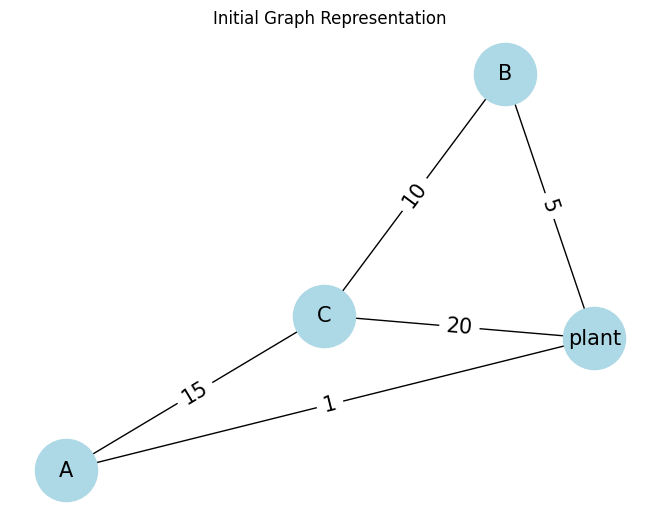

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph object
G = nx.Graph()

# Add nodes
for node in pipes:
    G.add_node(node)

# Add edges with weights
for node, connections in pipes.items():
    for dest, weight in connections.items():
        G.add_edge(node, dest, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=15)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_size=15)

plt.title("Initial Graph Representation")
plt.show()




The diagram above illustrates the initial problem. Each circle represents a house or the plant, and the lines connecting them represent the pipes. The numbers on the lines are the costs associated with each pipe.

Now, let's visualize the solution. In the next diagram, we'll highlight the pipes that form the Minimum Spanning Tree (MST) in a different color to distinguish them from the rest.


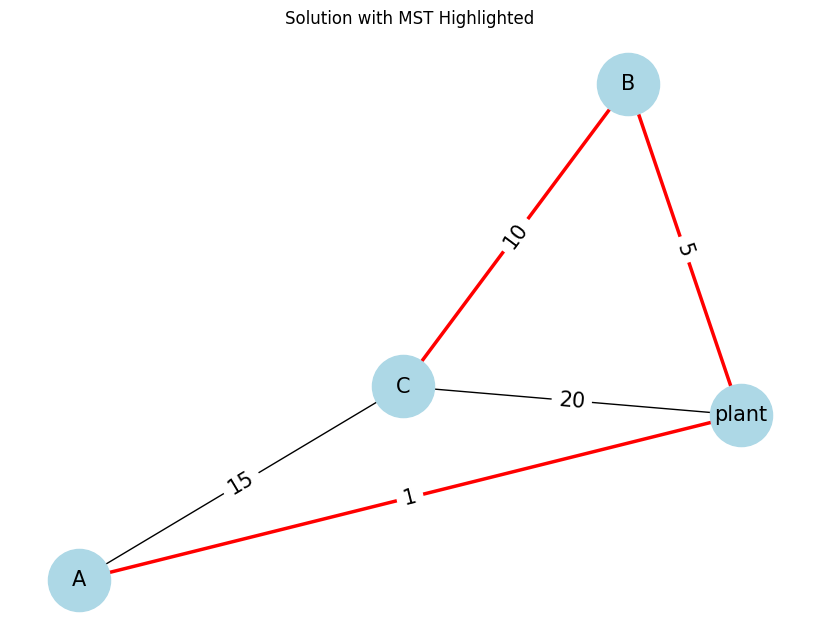

In [3]:
# Extract the edges from the MST solution
mst_edges = [(u, v) for u, v, w in kruskal(pipes)]

# Draw the graph with MST edges highlighted
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=15)
nx.draw_networkx_edges(G, pos, edgelist=mst_edges, width=2.5, edge_color='red')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_size=15)

plt.title("Solution with MST Highlighted")
plt.show()


In the diagram above, the red edges represent the pipes selected to form the Minimum Spanning Tree (MST). These are the pipes that ensure every house has access to water while minimizing the total cost.

As you can see:
- The plant is directly connected to houses A and B.
- House B is then connected to house C.

The associated costs for these connections are labeled on the edges, and their sum gives the minimum cost of 16.

This visual representation can help you intuitively grasp the problem's structure and the solution. The goal is to connect all nodes (houses and plant) with the fewest edges and lowest total cost, without forming any loops.